In [17]:
from ucimlrepo import fetch_ucirepo 
  
# Fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# Split into X and Y
X = cdc_diabetes_health_indicators.data.features 
Y = cdc_diabetes_health_indicators.data.targets 

In [18]:
X.describe([0.25, 0.5, 0.75])

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth              253680 non-n

In [15]:
Y.describe([0.25, 0.5, 0.75])

,Diabetes_binary
count,253680.000000
mean,0.139333
std,0.346294
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [16]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 1 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   Diabetes_binary  253680 non-null  int64
dtypes: int64(1)
memory usage: 1.9 MB


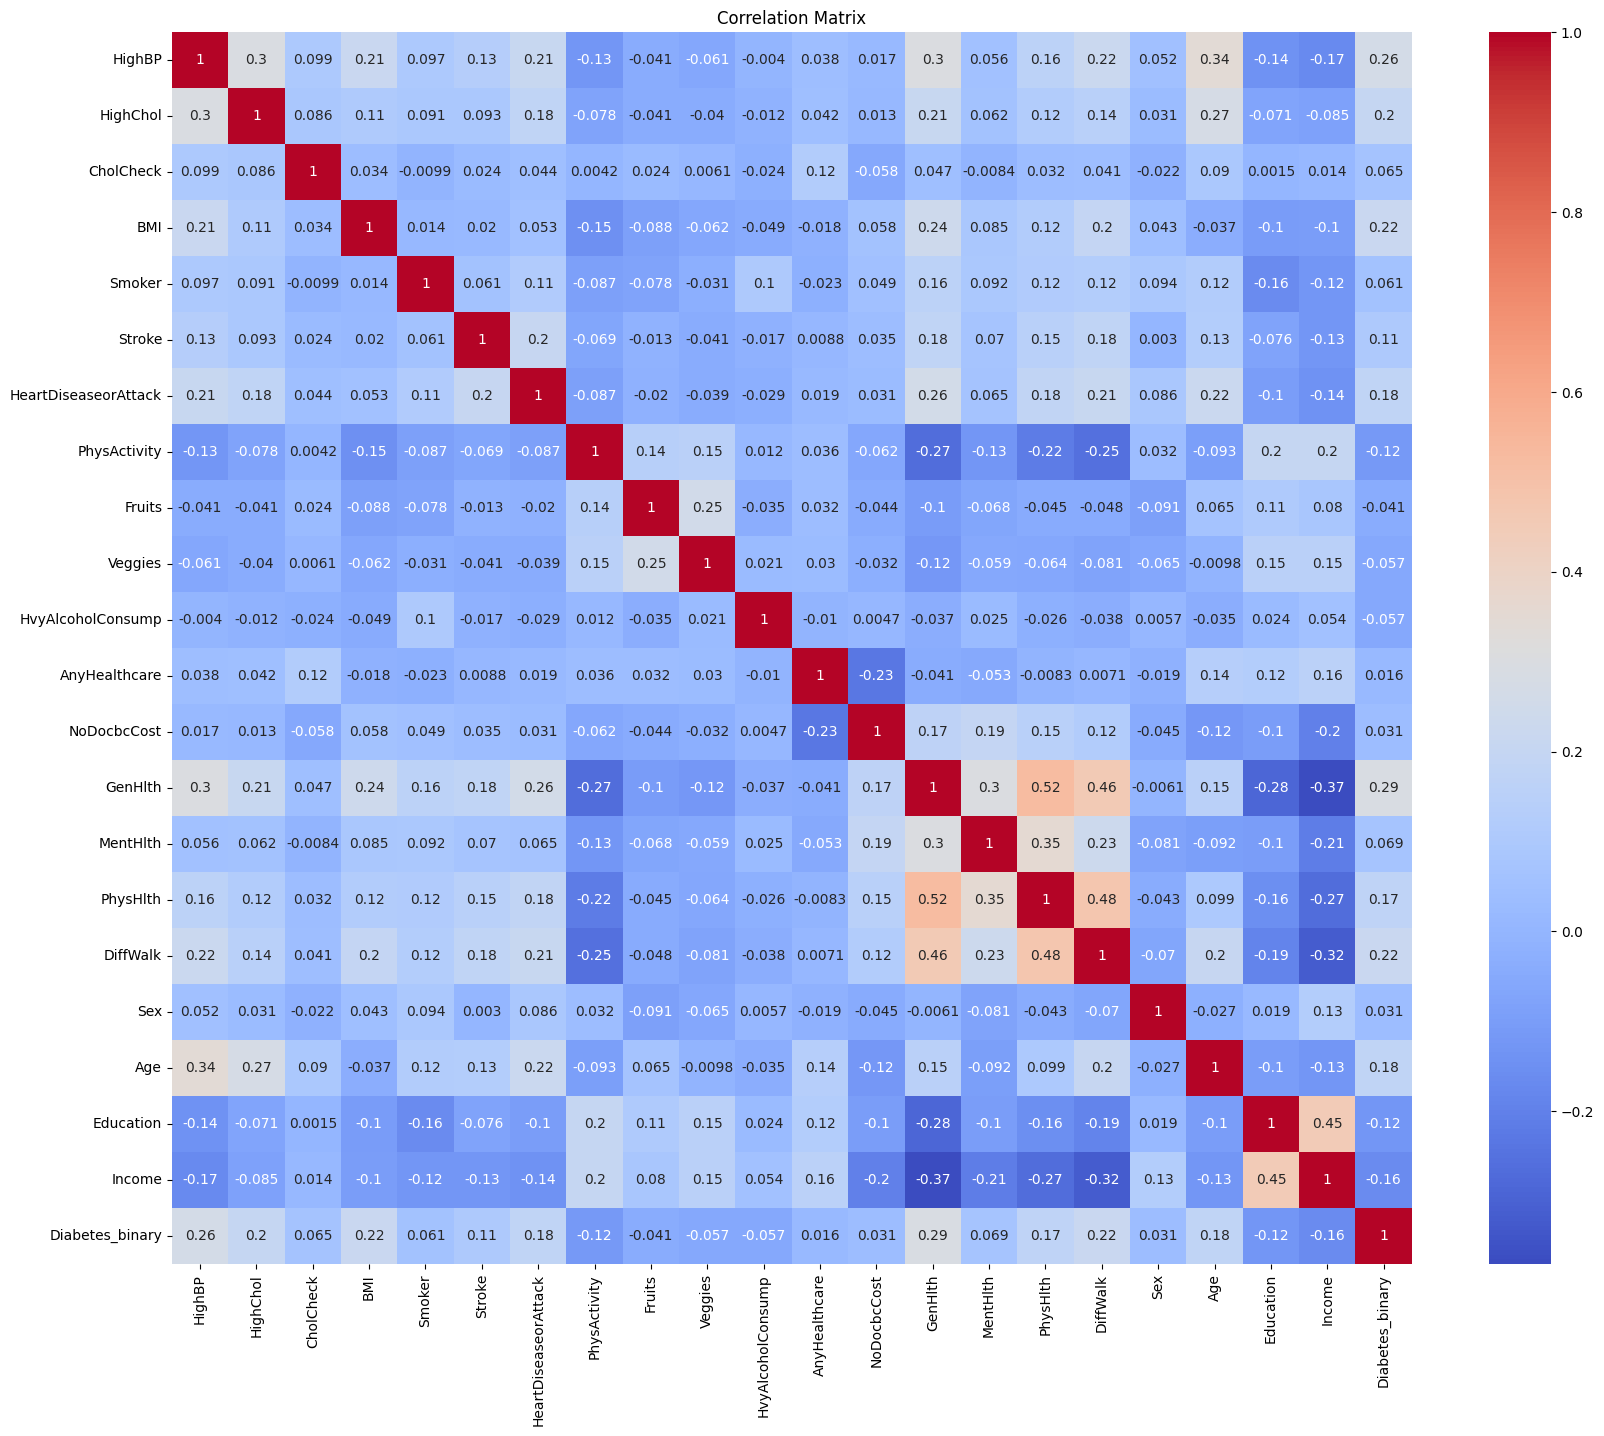

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

combined = pd.concat([X, Y], axis=1)
correlation_matrix = combined.corr()

# Create the heatmap
plt.figure(figsize=(20, 16))  # Adjust figure size as needed
plot = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
fig = plot.figure.savefig("correlation_plot.png")

#### For the pair-plot, we take a 1% sample to SIGNIFICANTLY reduce run time and to get a general idea of the pair plot for the whole 250,000 instances of data.

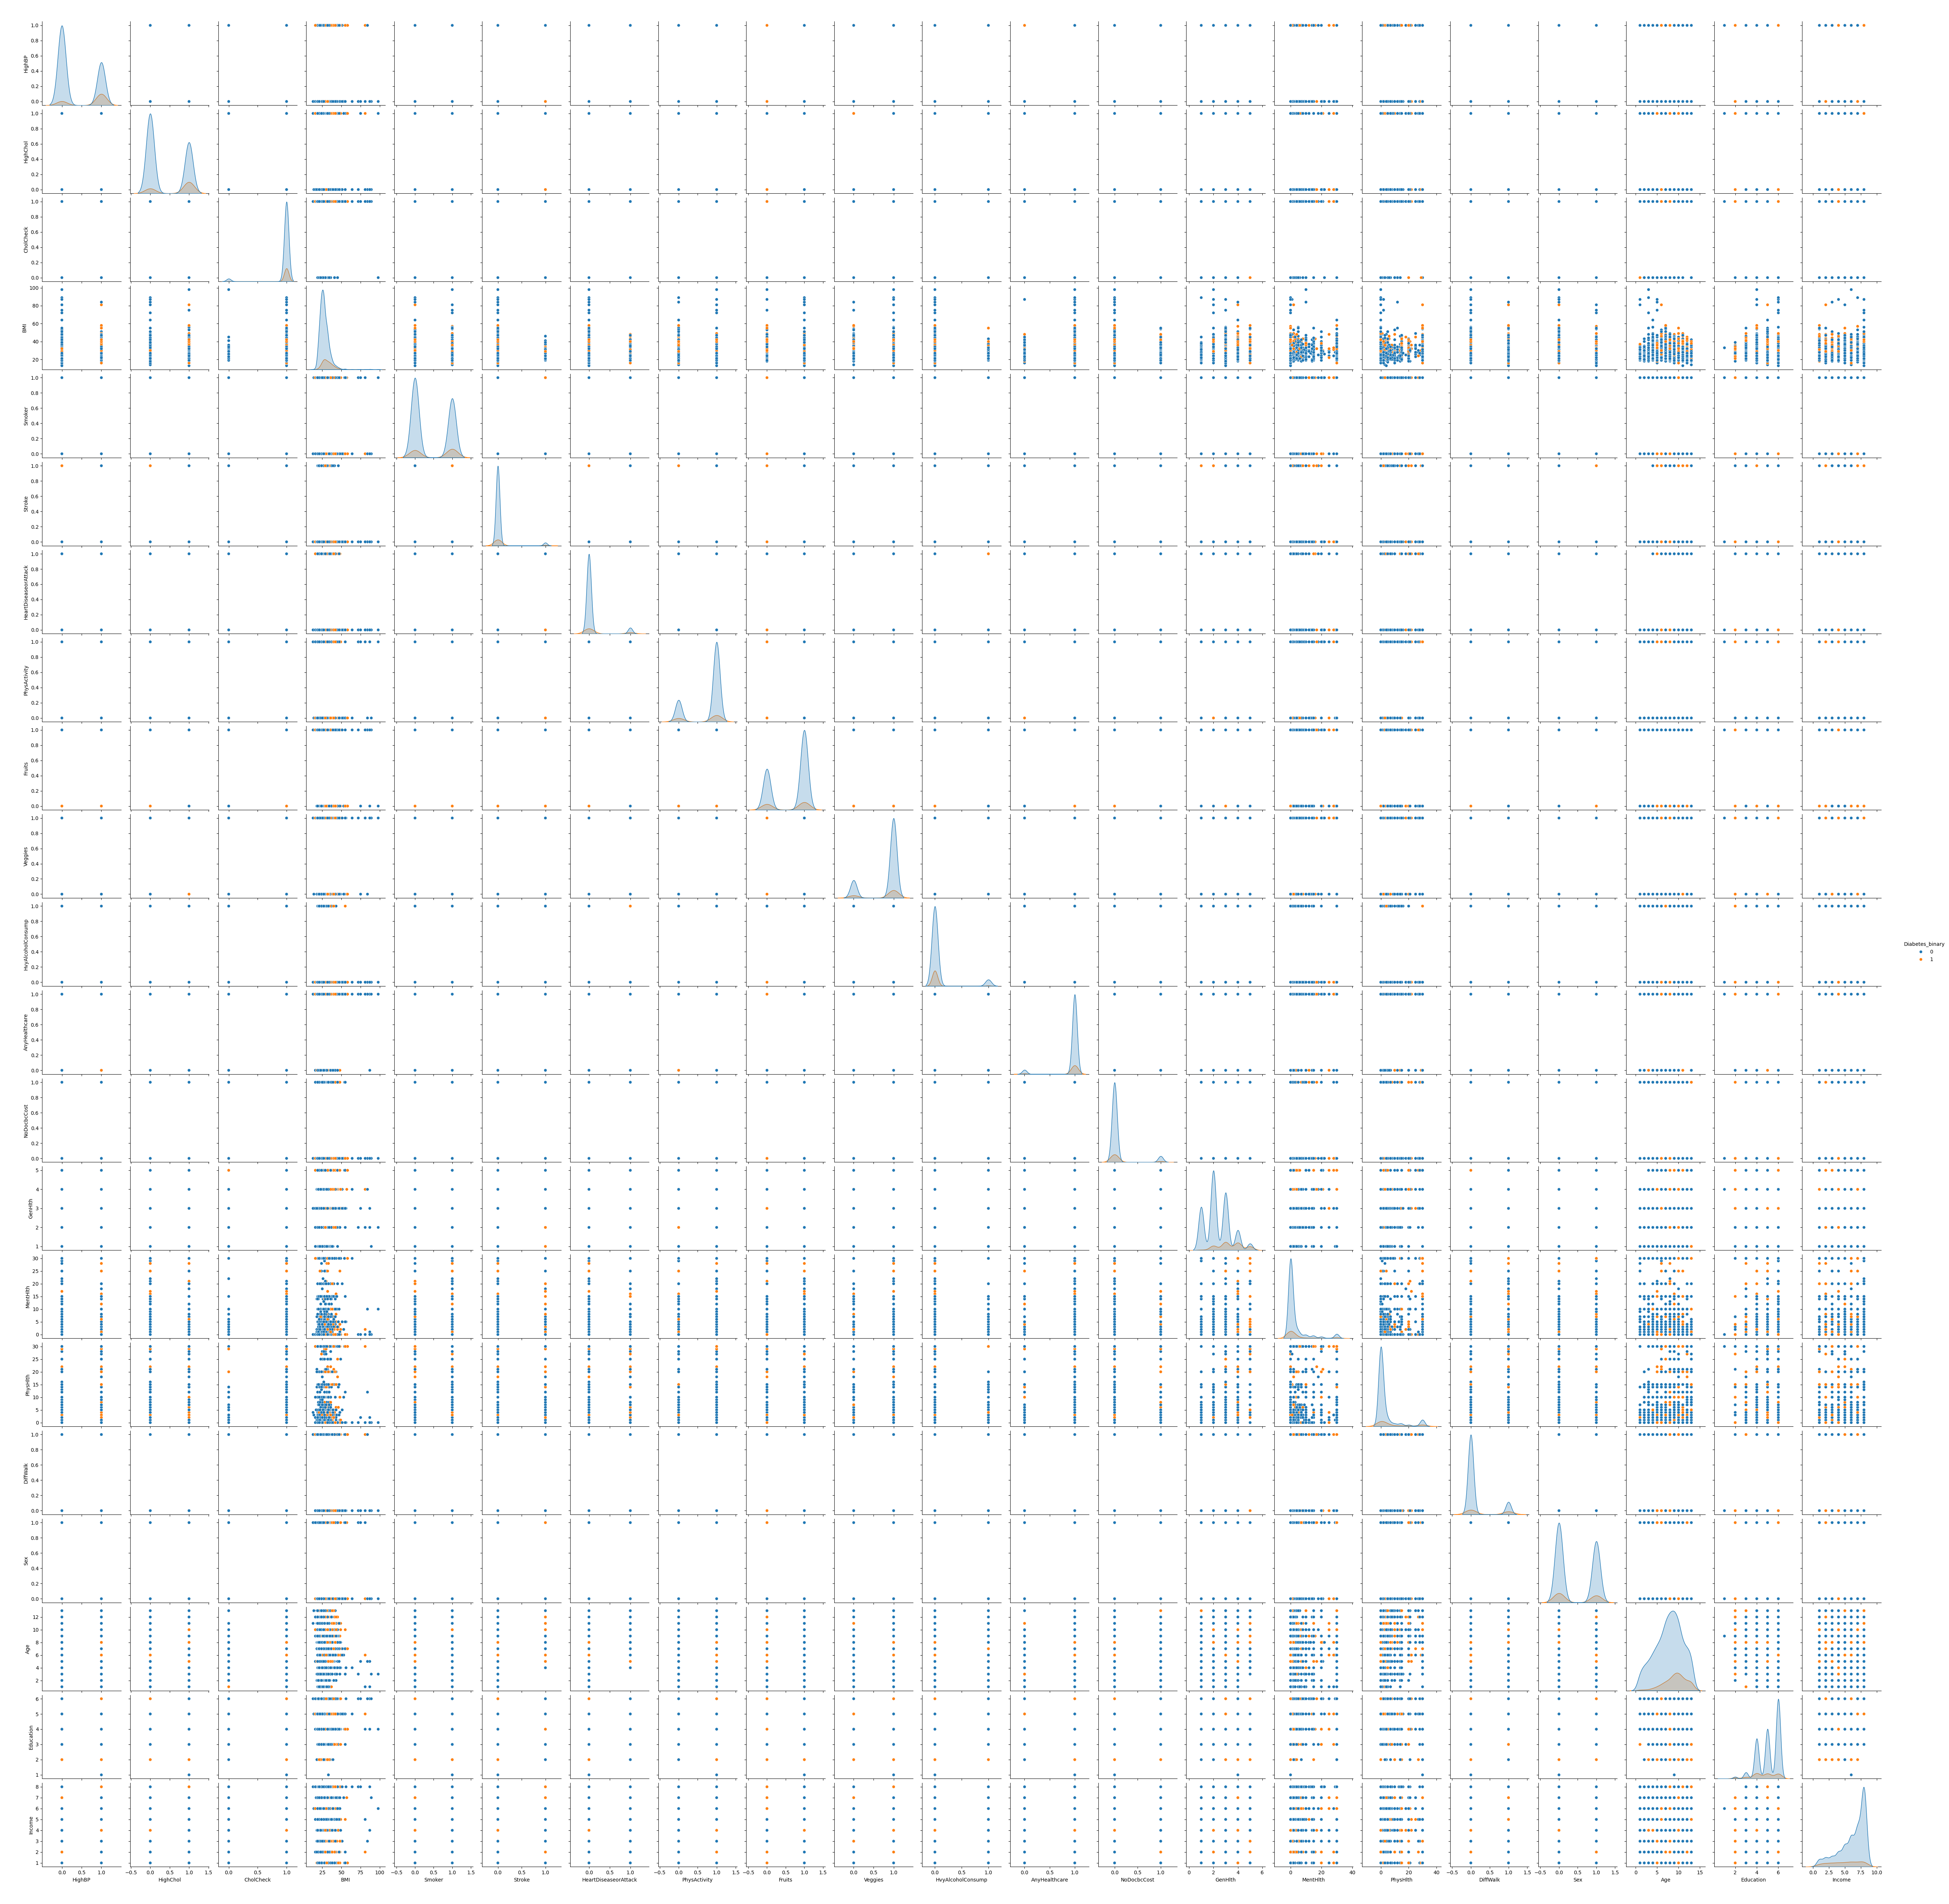

<Figure size 5373.99x5250 with 0 Axes>

In [4]:
from IPython.display import Image
path = "seaborn_pairplot.png"
plot = sns.pairplot(data=combined.sample(2500), hue="Diabetes_binary")
fig = plot.figure.savefig(path) 

# Clear all the figure data from memory
plt.clf()
Image(path)

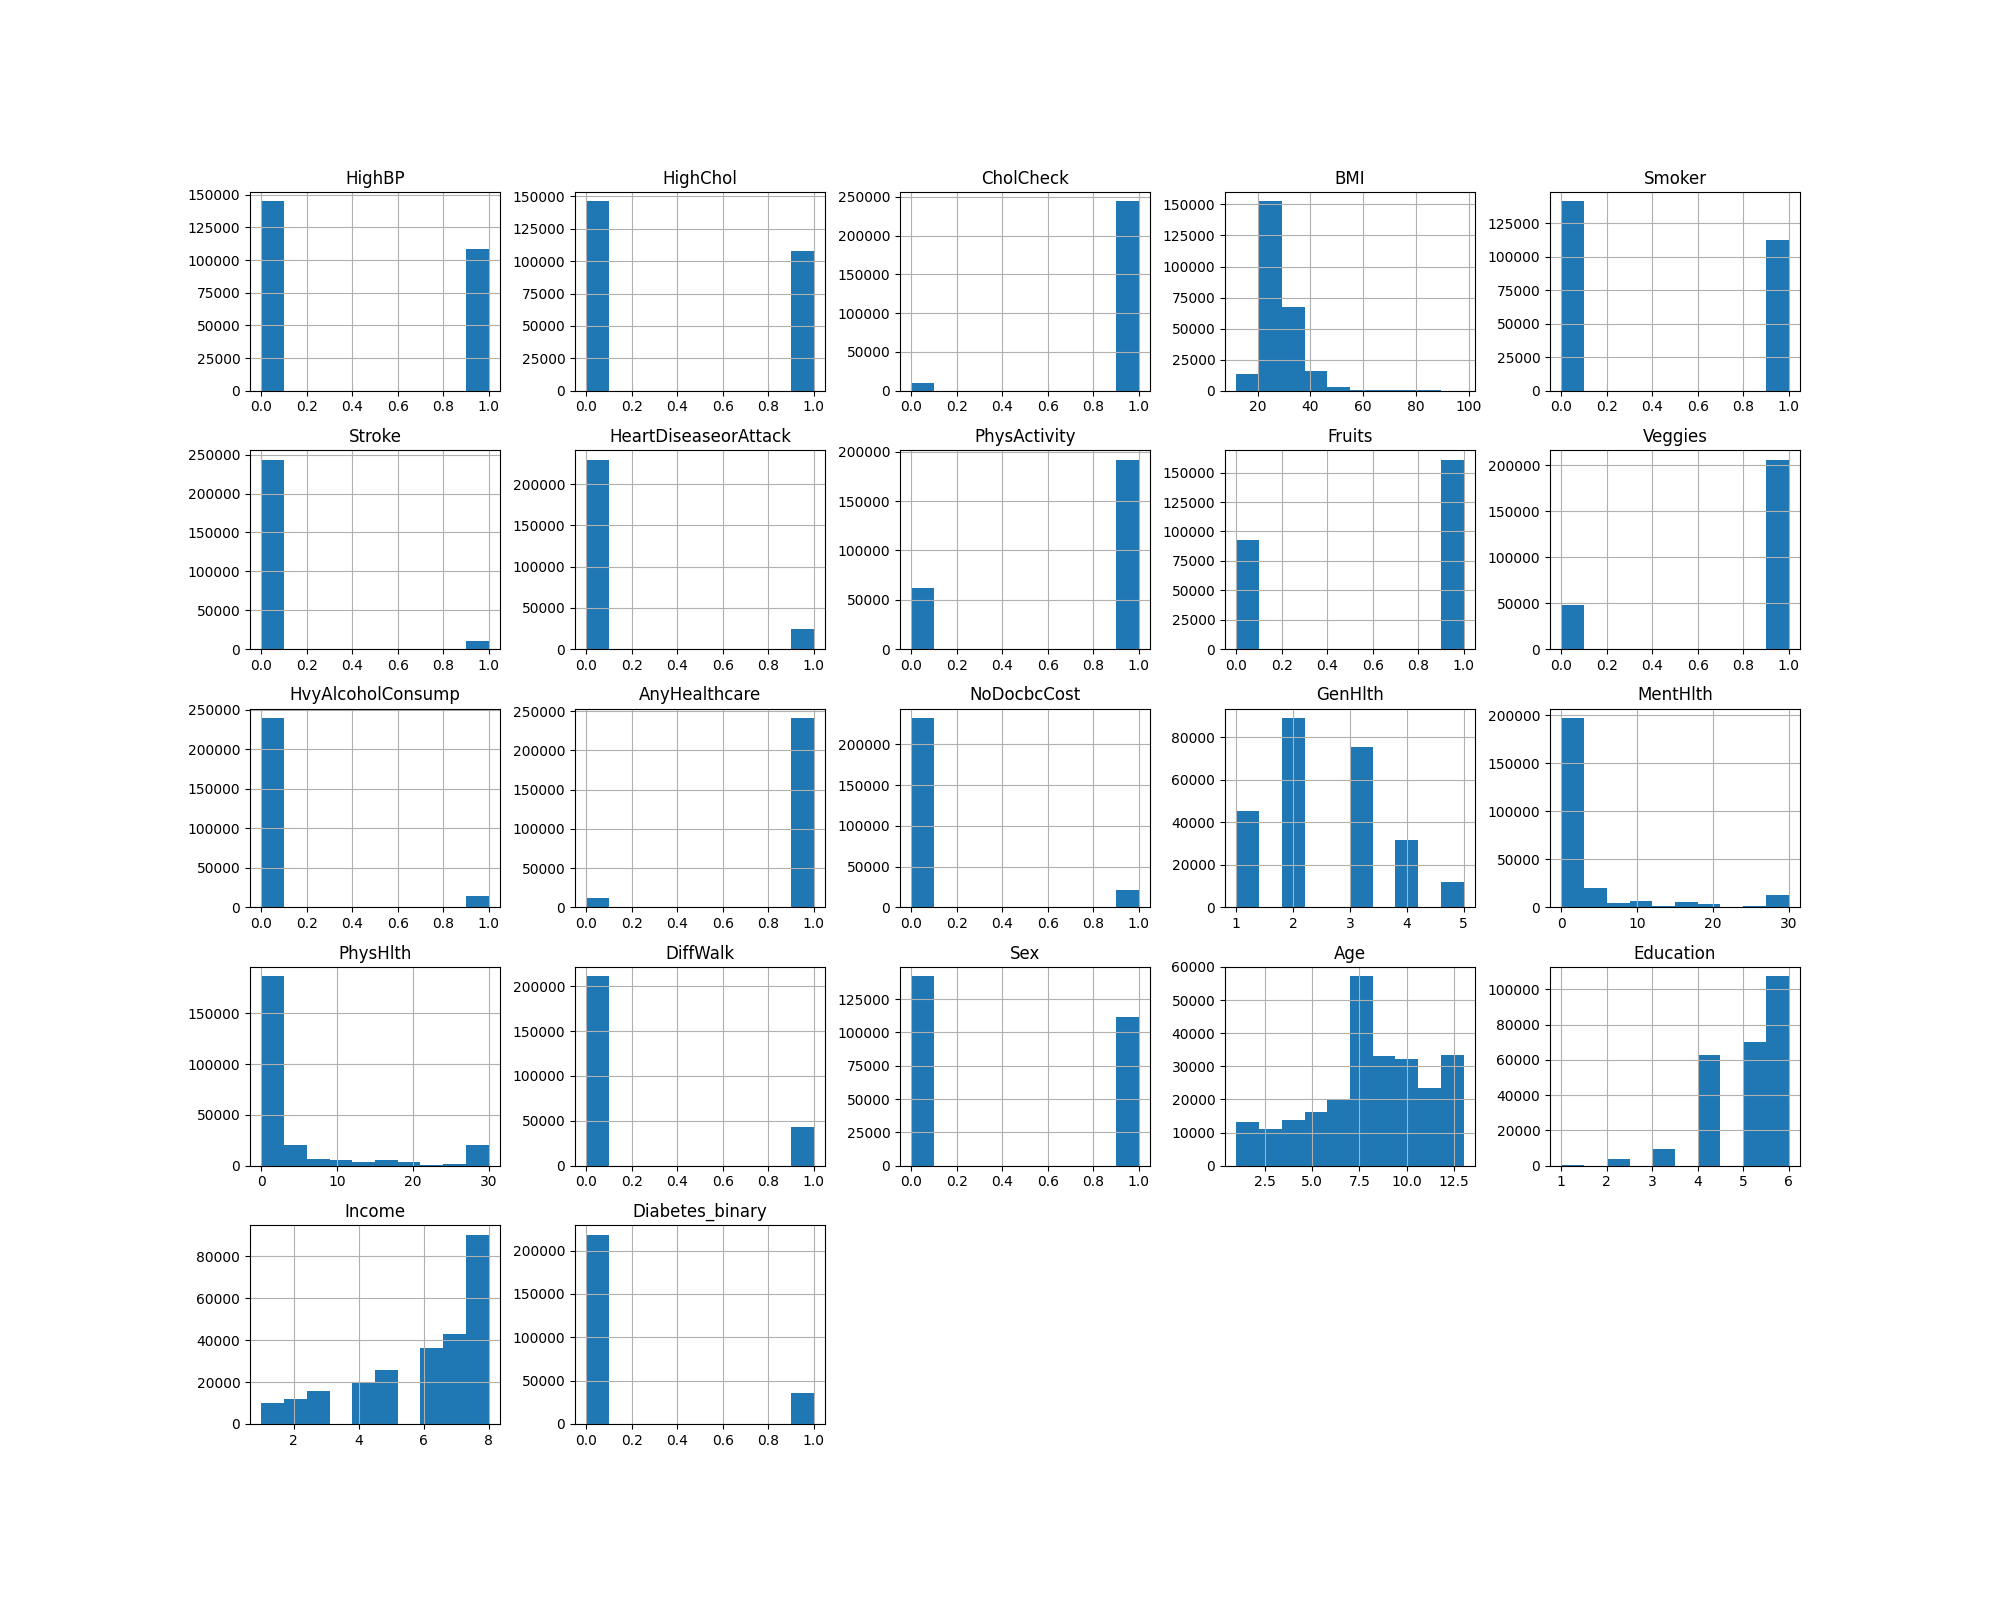

<Figure size 2000x1600 with 0 Axes>

In [11]:
path = "histplot.png"
plot = combined.hist(figsize=(20, 16))
plt.savefig(path) 

# Clear all the figure data from memory
plt.clf()
Image(path)